In [ ]:
# Investigate Numeric relationships and use a different scalar
# Find a better way to deal with NA's
# Need to work out which variable are correlated to drop
# Need to see if any variables are duplicated
# Need to see if any variables are constant for both above and under 50K
# how are you dealing with class inbalance

In [7]:
import pandas as pd
from config import config
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import preprocessors
from pipeline import income_pipeline
from helpers import get_meta_columns
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

(['age',
  'class of worker',
  'detailed industry recode',
  'detailed occupation recode',
  'education',
  'wage per hour',
  'enroll in edu inst last wk',
  'marital stat',
  'major industry code',
  'major occupation code',
  'race',
  'hispanic origin',
  'sex',
  'member of a labor union',
  'reason for unemployment',
  'full or part time employment stat',
  'capital gains',
  'capital losses',
  'dividends from stocks',
  'tax filer stat',
  'region of previous residence',
  'state of previous residence',
  'detailed household and family stat',
  'detailed household summary in household',
  'instance weight',
  'migration code-change in msa',
  'migration code-change in reg',
  'migration code-move within reg',
  'live in this house 1 year ago',
  'migration prev res in sunbelt',
  'num persons worked for employer',
  'family members under 18',
  'country of birth father',
  'country of birth mother',
  'country of birth self',
  'citizenship',
  'own business or self employed',

In [ ]:
data = pd.read_csv(config.TRAIN_DIR, names=get_meta_columns(), na_values=' ?')

# # encodes the target variable as binary
data[config.TARGET] = data[config.TARGET].map(config.TARGET_ENCODING)
 
X_train, X_test, y_train, y_test = train_test_split(
         data[config.FEATURES], data[config.TARGET], test_size=0.2, random_state=0
         )  

In [ ]:
visualisation_pipeline = Pipeline(
    [
        (
            "EncodeNotInUniverse",
            preprocessors.EncodeNotInUniverse(variables=config.FEATURES),
        ),
        (
            "DropNaFeatures",
            preprocessors.DropDuplicates(variables=config.DUPLICATE_VALS),
        ),
        (
            "Fill_NA_encoder",
            preprocessors.FillNAEncoder(variables=config.CATEGORICAL_VALS),
        )
    ]
    

In [10]:
def analysis_categoricial(df, var):
    plt.title(var)
    data[['Income',var]].groupby(var).mean().plot.bar()
    plt.show()

# for var in config.DROP_VALS:
#     analysis_categoricial(data, var)
# 
# # Cardinality check
# for var in config.DROP_VALS:
#     print(var, len(data[var].unique()))


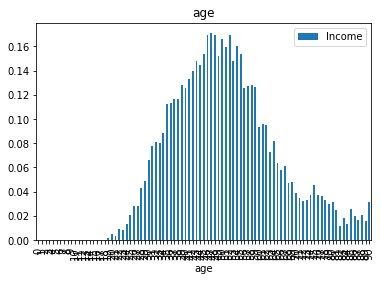

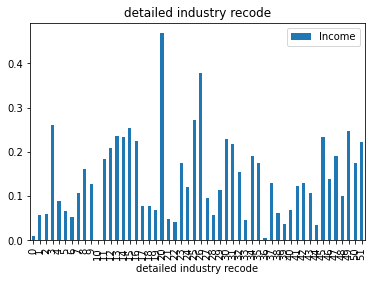

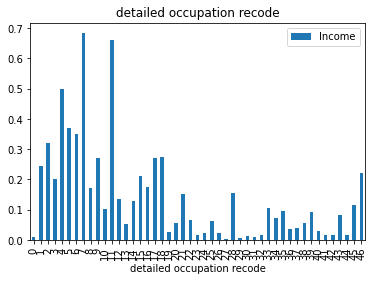

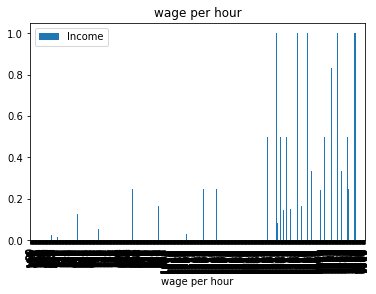

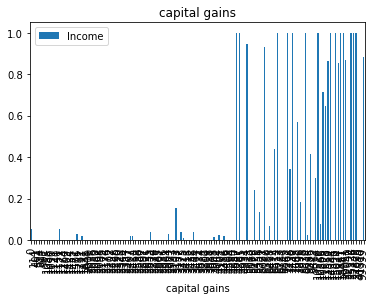

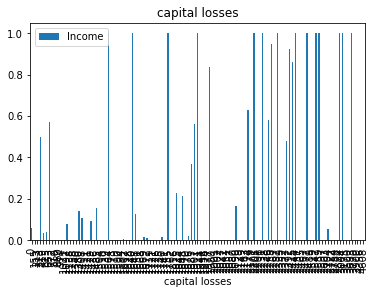

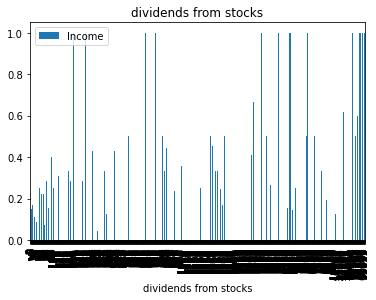

In [ ]:
plotting_df = pd.DataFrame(pd.concat([X_train_processed, y_train], axis=1))

for var in config.NUMERIC_VALS:
    

		for var in self.variables:
			ordered_labels = data.groupby([var])["Income"].mean().sort_values().index
			self.orderd_labels_dict[var] = {value: index for index, value in enumerate(ordered_labels, 0)}

['education',
 'marital stat',
 'race',
 'hispanic origin',
 'sex',
 'full or part time employment stat',
 'tax filer stat',
 'detailed household summary in household',
 'live in this house 1 year ago',
 'citizenship',
 'migration code-move within reg',
 'member of a labor union']